# Week 3

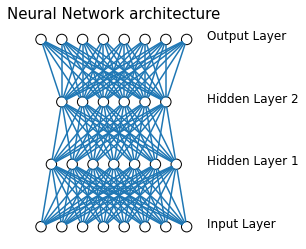

In [17]:
#neural network visualization
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()
        
network = DrawNN( [8,7,6,8] )
network.draw()

## Multivariable Chain Rule

$$f(x_1,x_2,x_3,...,x_n)=f(X)$$

Notice that I've written that x in bold. Just to help you remember that this x represents a sequence of variables which will now more conveniently think of as an n-dimensional vector.

$$x_1(t)=...$$
$$x_2(t)=...$$
$$x_3(t)=...$$
$$...$$
$$x_n(t)=...$$

Each of the components of our x vector are themselves functions of some other variable t (**each component of x is also a function of t**)

And we want to know that **the derivative of f with respect to t**

$$\frac{\partial{f}}{\partial{X}}=\begin{bmatrix}\frac{\partial{f}}{\partial{x_1}}\\\frac{\partial{f}}{\partial{x_2}}\\\frac{\partial{f}}{\partial{x_3}}\\...\\\frac{\partial{f}}{\partial{x_n}}\end{bmatrix}$$

$$\frac{dX}{dt}=\begin{bmatrix}\frac{dx_1}{dt}\\\frac{dx_2}{dt}\\\frac{dx_3}{dt}\\...\\\frac{dx_n}{dt}\end{bmatrix}$$

Thinking back to our linear algebra, this is exactly what the dot product does.

$$\frac{df}{dt}=\begin{bmatrix}\frac{\partial{f}}{\partial{x_1}}\\\frac{\partial{f}}{\partial{x_2}}\\\frac{\partial{f}}{\partial{x_3}}\\...\\\frac{\partial{f}}{\partial{x_n}}\end{bmatrix}\cdot\begin{bmatrix}\frac{dx_1}{dt}\\\frac{dx_2}{dt}\\\frac{dx_3}{dt}\\...\\\frac{dx_n}{dt}\end{bmatrix}=\frac{\partial{f}}{\partial{X}}\cdot\frac{dX}{dt}$$

So from our knowledge of linear algebra, we can say that df by dx must be the transverse of the Jacobian of f. 

$$\frac{\partial{f}}{\partial{X}}=\begin{bmatrix}\frac{\partial{f}}{\partial{x_1}}\\\frac{\partial{f}}{\partial{x_2}}\\\frac{\partial{f}}{\partial{x_3}}\\...\\\frac{\partial{f}}{\partial{x_n}}\end{bmatrix}=(J_f)^T$$

The last thing to realize is that taking the dot product of two column vectors is the same operation as multiplying a row vector by a column vector. 

$$\frac{df}{dt}=J_f\cdot\frac{dX}{dt}$$

**For example**

$$f(x)=5x$$
$$x(u)=1-u$$
$$u(t)=t^2$$

So we've got three functions, and we're separating f from t now by an extra step.

$$f(t)=5-5t^2$$
$$f'(t)=-10t$$

Or, we can use the **Chain Rules**:

$$\frac{df}{dt}=\frac{df}{dx}\frac{dx}{du}\frac{du}{dt}=-10t$$

Let's start by considering the function $f(X(U(t)))$

$$f(X)=f(x_1,x_2)$$
$$X(U)=\begin{bmatrix}x_1(u_1,u_2)\\x_2(u_1,u_2)\end{bmatrix}$$
$$U(t)=\begin{bmatrix}u_1(t)\\u_2(t)\end{bmatrix}$$

If, once again, we'd like to know the derivative of f with respect to t:

$$\frac{df}{dt}=\frac{\partial{f}}{\partial{X}}\frac{\partial{X}}{\partial{U}}\frac{dU}{dt}=\begin{bmatrix}\frac{\partial{f}}{\partial{x_1}},\frac{\partial{f}}{\partial{x_2}}\end{bmatrix}\begin{bmatrix}\frac{\partial{x_1}}{\partial{u_1}}&\frac{\partial{x_1}}{\partial{u_2}}\\\frac{\partial{x_2}}{\partial{u_1}}&\frac{\partial{x_2}}{\partial{u_2}}\end{bmatrix}\begin{bmatrix}\frac{du_1}{dt}\\\frac{du_2}{dt}\end{bmatrix}$$

## Neural Networks

Neural networks can be used for image recongnition and language translation.

For example, we have a network looks like:

$$a^{(0)}\to a^{(1)}$$

$$a^{(1)}=\sigma(wa^{(0)}+b)$$

In this case:

a = "activity"

w = "weight" (parameter)

b = "bias" (parameter)

$\sigma$="activation function"

It is **$\sigma$ that gives neural networks their association to the brain**. Neurons in the brain receive information from their neighbors through chemical and electrical stimulation. And when the sum of all these stimulations goes beyond a certain threshold amount, the neuron is suddenly activated and starts stimulating its neighbors in turn.

Actually, **$\sigma$ is a nonlinear function**. An example of a function which has this threshold holding property is the hyperbolic tangent function, tanh, which is a nice well behaved function with a range from minus one to one. You may not have met tanh before, but it's just the ratio of some exponential terms and nothing your account scalar tools can already handle. Tanh actually belongs to a family of similar functions or with this characteristic S shape called sigmoids. Hence, why we use $\sigma$ for this term.

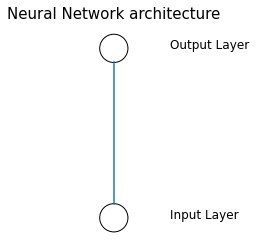

In [14]:
network = DrawNN( [1,1] )
network.draw()

But for a neural network, only 2 neurons are not enough. We need to add more neurons.

For example, we can add two input neurons to $a^{(1)}$: $$a_0^{(0)}\rightarrow a^{(1)}\leftarrow a_1^{(0)}$$

And we will have expression like: $$a^{(1)}=\sigma(w_0a_0^{(0)}+w_1a_1^{(0)}+b)$$

If we add the third input neuron: $$a^{(1)}=\sigma(w_0a_0^{(0)}+w_1a_1^{(0)}++w_2a_2^{(0)}+b)$$

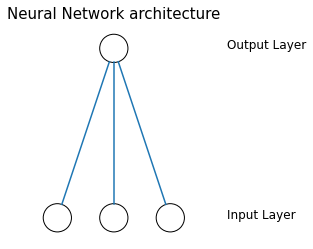

In [15]:
network = DrawNN( [3,1] )
network.draw()

If we **add n input neurons**, we can turn $w_0$ to $w_n$ and $a_0$ to $a_n$ into vectors:

$$a^{(1)}=\sigma(\vec{w}\cdot\vec{a^{(0)}}+b)$$

Now if we **add a second output neuron:**

Because each output neuron has its own weighting(w) and each neuron has its own bias(b). So we can write a pair of equations to describe this scenario, with one for each of the outputs:

$$a_0^{(1)}=\sigma(\vec{w_0}\cdot\vec{a^{(0)}}+b_0)$$

$$a_1^{(1)}=\sigma(\vec{w_1}\cdot\vec{a^{(0)}}+b_1)$$

And if we **add the third output neuron"**

$$a_2^{(1)}=\sigma(\vec{w_2}\cdot\vec{a^{(0)}}+b_2)$$

We can again crunch these two equations down to a more compact vector form, where the two outputs are each rows of a column vector, meaning that we now hold our two weight vectors in a weight matrix, and our two biases in a bias vector. 

$$\vec{a^{(1)}}=\sigma(\vec{W}\cdot\vec{a^{(0)}}+\vec{b^{(1)}})$$

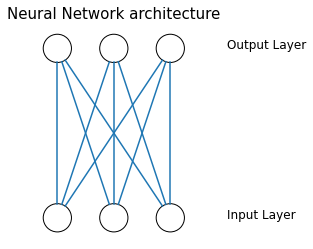

In [16]:
network = DrawNN( [3,3] )
network.draw()

So **for n input and m output neural network**, we can have this equasion:

$$\vec{a^{(1)}}=\sigma(\vec{W}\cdot\vec{a^{(0)}}+\vec{b^{(1)}})$$

which represents:

$$\begin{bmatrix}a_0^{(1)}\\a_1^{(1)}\\...\\a_{m-1}^{(1)}\end{bmatrix} = \sigma \begin{pmatrix} \begin{bmatrix}w_{0,0}^{(1)}&w_{0,1}^{(1)}&...&w_{0,n-1}^{(1)}\\ w_{1,0}^{(1)}&w_{1,1}^{(1)}&...&w_{1,n-1}^{(1)}\\ ...&...&...&... \\ w_{m-1,0}^{(1)}&w_{m-1,1}^{(1)}&...&w_{m-1,n-1}^{(1)}\end{bmatrix} \begin{bmatrix}a_0^{(0)}\\a_1^{(0)}\\...\\a_{n-1}^{(0)}\end{bmatrix} + \begin{bmatrix}b_0^{(1)}\\b_1^{(1)}\\...\\b_{m-1}^{(1)}\end{bmatrix} \end{pmatrix}$$

Neural networks often have **one or several layers of neurons between the inputs and the outputs**. We refer to these as **hidden layers**, and they behave in exactly the same way as we've seen so far, except that outputs are now the inputs of the next layer. 

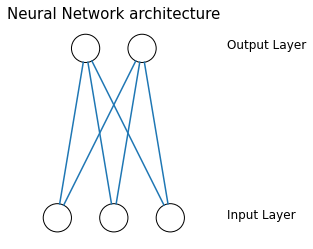

In [13]:
network = DrawNN( [3,2] )
network.draw()

If we know the input vector, sigma, W and b, how to calculate the output vector?

In [6]:
import numpy as np

# First set up the network.
sigma = np.tanh
W = np.array([[-2, 4, -1],[6, 0, -3]])
b = np.array([0.1, -2.5])

# Define our input vector
x = np.array([0.3, 0.4, 0.1])

def a1(a0) :
  return sigma(np.matmul(W,a0) + b)

a1(x)

array([ 0.76159416, -0.76159416])

We're going to see how the **multivariate chain rule** will enable us to iteratively update the values of all the weights and biases such that the network learns to classify input data based on a set of training examples. 

When we say that we are **training a network**, we typically mean using some kind of **labelled data**, which are **pairs of matching inputs and outputs**.

The classic training method is called **back propagation** because it looks first at the output neurons and then it works back through the network.

**Cost Function**

Initially, we will set all of our weights and biases to be a random number. And so initially, when we pass some data into our network, what we get out will be meaningless. However, we can then define a cost function, which is simply the sum of the squares of the differences between the desired output y, and the output that our untrained network currently gives us. If we were to focus on the relationship between one specific weight and the resulting cost function, it might look something like this, where if it's either too large or too small, the cost is high. But, at one specific value, the cost is at a minimum. 

So basically what we are trying to do is to **find the best parameters** to make our neural network get the **minimum difference** between **the desired output** y, and **the realisitic output** that our untrained network currently gives us.

Now, based on our understanding of **calculus**, if we were somehow able to work out the **gradient** of C (soct) with respect to the variable W (weight), at some initial point W0, then we can simply head in the opposite direction. It means we cand find the **maximum difference** or **minimum difference** bwetten between **the desired output** y, and **the realisitic output** by calculating at which point W0 will make **gradient equals to 0**.

All of this is **using calculus to find the optimization parameters for our neural network.**

So, now that we know what we're after, we just need to look again at our simple two-node network. And at this point, we could immediately write down **a chain rule expression** for **the partial derivative of the cost** with respect to either our **weight** or our **bias**. 

$$C = (a^{(1)}-y)^2$$

$$\frac{\partial{C}}{\partial{w}}=\frac{\partial{C}}{\partial{a^{(1)}}}\frac{\partial{a^{(1)}}}{\partial{w}}$$

$$\frac{\partial{C}}{\partial{b}}=\frac{\partial{C}}{\partial{a^{(1)}}}\frac{\partial{a^{(1)}}}{\partial{b}}$$

However, it's often convenient to make use of an additional term which we will call z1, that will hold our weighted activation plus bias terms. 

$$z^{(1)}=wa^{(0)}+b$$

$$a^{(1)}=\sigma(z^{(1)})$$

So:

$$\frac{\partial{C}}{\partial{W}}=\frac{\partial{C}}{\partial{a^{(1)}}}\frac{\partial{a^{(1)}}}{\partial{z^{(1)}}}\frac{\partial{z^{(1)}}}{\partial{w}}$$

$$\frac{\partial{C}}{\partial{b}}=\frac{\partial{C}}{\partial{a^{(1)}}}\frac{\partial{a^{(1)}}}{\partial{z^{(1)}}}\frac{\partial{z^{(1)}}}{\partial{b}}$$

We now have the two chains rule expressions we'd require to navigate the two dimensional WB space in order to minimize the costs of this simple network for a set of training examples. 

Clearly, things are going to get a little more complicated when we add more neurons. But fundamentally, we're still just applying the chain rule to link each of our weights and biases back to its effect on the cost, ultimately allowing us to train our network. In the following exercises, we're going to work through how to extend what we saw for the simple case to multi-layer networks. 

## Quiz

## 4. Using your answer to the previous question, let's see it implemented in code.

The following code block has an example implementation of $\frac{\partial{C_k}}{\partial{w^{(1)}}}$. It up to you to implant $\frac{\partial{C_k}}{\partial{b^{(1)}}}$.

Don't worry if you don't know exactly how the code works. It's more important that you get a feel for what is going on.

We will introduce the following derivative in the code,

$$\frac{d}{dz}tanh(z)=\frac{1}{cosh^2z}$$

Complete the function 'dCdb' below. Replace the ??? towards the bottom, with the expression you calculated in the previous question.

In [20]:
# First define our sigma function.
sigma = np.tanh

# Next define the feed-forward equation.
def a1 (w1, b1, a0) :
  z = w1 * a0 + b1
  return sigma(z)

# The individual cost function is the square of the difference between
# the network output and the training data output.
def C (w1, b1, x, y) :
  return (a1(w1, b1, x) - y)**2

# This function returns the derivative of the cost function with
# respect to the weight.
def dCdw (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = 2 * (a1(w1, b1, x) - y) # Derivative of cost with activation
  dadz = 1/np.cosh(z)**2 # derivative of activation with weighted sum z
  dzdw = x # derivative of weighted sum z with weight
  return dCda * dadz * dzdw # Return the chain rule product.

# This function returns the derivative of the cost function with
# respect to the bias.
# It is very similar to the previous function.
# You should complete this function.
def dCdb (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = 2 * (a1(w1, b1, x) - y)
  dadz = 1/np.cosh(z)**2
  """ Change the next line to give the derivative of
      the weighted sum, z, with respect to the bias, b. """
  dzdb = 1
  return dCda * dadz * dzdb

"""Test your code before submission:"""
# Let's start with an unfit weight and bias.
w1 = 2.3
b1 = -1.2
# We can test on a single data point pair of x and y.
x = 0
y = 1
# Output how the cost would change
# in proportion to a small change in the bias
print( dCdb(w1, b1, x, y) )

-1.1186026425530913


## 5. Recall that when we add more neurons to the network, our quantities are upgraded to vectors or matrices.

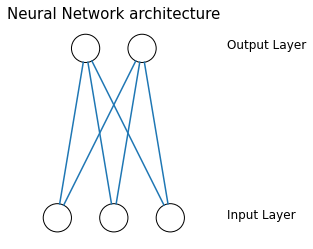

In [22]:
network = DrawNN( [3,2] )
network.draw()

$$\mathbf{a}^{(1)}=\sigma(\mathbf{Z}^{(1)})$$

$$\mathbf{z}^{(1)}=\mathbf{W}^{(1)}\mathbf{a}^{(0)}+\mathbf{b}^{(1)}$$

The individual cost functions remain scalars. Instead of becoming vectors, the components are summed over each output neuron.

$$C_k = \sum_i{(a_i^{(1)}-y_i)^2}$$

Note here that ii labels the output neuron and is summed over, whereas kk labels the training example.

The training data becomes a vector too,

x → X and has the same number of elements as input neurons.

y → Y and has the same number of elements as output neurons.

This allows us to write the cost function in vector form using the modulus squared,

$$C_k=|\mathbf{a}^{(1)}-\mathbf{y}|^2$$

Use the code block below to play with calculating the cost function for this network.

In [25]:
# Define the activation function.
sigma = np.tanh

# Let's use a random initial weight and bias.
W = np.array([[-0.94529712, -0.2667356 , -0.91219181],
              [ 2.05529992,  1.21797092,  0.22914497]])
b = np.array([ 0.61273249,  1.6422662 ])

# define our feed forward function
def a1 (a0) :
  # Notice the next line is almost the same as previously,
  # except we are using matrix multiplication rather than scalar multiplication
  # hence the '@' operator, and not the '*' operator.
  z = W @ a0 + b
  # Everything else is the same though,
  return sigma(z)

# Next, if a training example is,
x = np.array([0.7, 0.6, 0.2])
y = np.array([0.9, 0.6])

# Then the cost function is,
d = a1(x) - y # Vector difference between observed and expected activation
C = d @ d # Absolute value squared of the difference.

C

1.7788340952508737

## 6. Let's now consider a neural network with hidden layers.

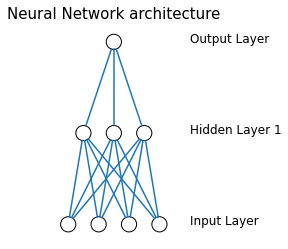

In [19]:
network = DrawNN( [4,3,1] )
network.draw()

Training this network is done by back-propagation because we start at the output layer and calculate derivatives backwards towards the input layer with the chain rule.

Let's see how this works.

If we wanted to calculate the derivative of the cost with respect to the weights of the final layer, then this is the same as previously (but now in vector form):

$$\frac{\partial{C_k}}{\partial{W^{(2)}}}=\frac{\partial{C_k}}{\partial{a^{(2)}}}\frac{\partial{a^{(2)}}}{\partial{z^{(2)}}}\frac{\partial{z^{(2)}}}{\partial{W^{(2)}}}$$

A similar expression can be constructed for the biases. 

If we want to calculate the derivative of the cost with respects to weights of the previous layer, we use the expression,

$$\frac{\partial{C_k}}{\partial{W^{(1)}}}=\frac{\partial{C_k}}{\partial{a^{(2)}}}\frac{\partial{a^{(2)}}}{\partial{a^{(1)}}}\frac{\partial{a^{(1)}}}{\partial{z^{(1)}}}\frac{\partial{z^{(1)}}}{\partial{W^{(1)}}}$$

Where $\frac{\partial{a^{(2)}}}{\partial{a^{(1)}}}$ itself can be expanded to,

$$\frac{\partial{a^{(2)}}}{\partial{a^{(1)}}}=\frac{\partial{a^{(2)}}}{\partial{z^{(2)}}}\frac{\partial{z^{(2)}}}{\partial{a^{(1)}}}$$

This can be generalised to any layer, 

$$\frac{\partial{C_k}}{\partial{W^{(i)}}}=\frac{\partial{C_k}}{\partial{a^{(N)}}}\frac{\partial{a^{(N)}}}{\partial{a^{(N-1)}}}\frac{\partial{a^{(N-1)}}}{\partial{a^{(N-2)}}}...\frac{\partial{a^{i+1)}}}{\partial{a^{(i)}}}\frac{\partial{a^{(i)}}}{\partial{z^{(i)}}}\frac{\partial{z^{(i)}}}{\partial{W^{(i)}}}$$

By further application of the chain rule.

Choose the correct expression for the derivative, 

$$\frac{\partial{a^{(j)}}}{\partial{a^{(j-1)}}}$$

Remembering the activation equations are,

$$a^{(n)}=\sigma(z^{(n)})$$

$$z^{(n)}=w^{(n)}a^{(n-1)}+b^{(n)}$$

The Right Answer is: $$\sigma'(z^{(j)})W^{(j)}$$